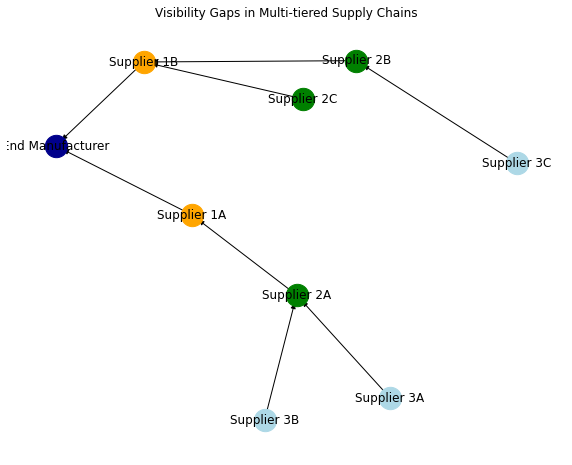

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def create_supply_chain_graph():
    G = nx.DiGraph()

    # Nodes for different tiers and OEM
    nodes = {
        'Tier 3': ['Supplier 3A', 'Supplier 3B', 'Supplier 3C'],
        'Tier 2': ['Supplier 2A', 'Supplier 2B', 'Supplier 2C'],
        'Tier 1': ['Supplier 1A', 'Supplier 1B'],
        'OEM': ['End Manufacturer']
    }

    # Adding nodes to the graph
    for key in nodes:
        for node in nodes[key]:
            G.add_node(node, tier=key)

    # Defining edges based on the original structure
    edges = [
        ('Supplier 3A', 'Supplier 2A'),
        ('Supplier 3B', 'Supplier 2A'),
        ('Supplier 3C', 'Supplier 2B'),
        ('Supplier 2A', 'Supplier 1A'),
        ('Supplier 2B', 'Supplier 1B'),
        ('Supplier 2C', 'Supplier 1B'),
        ('Supplier 1A', 'End Manufacturer'),
        ('Supplier 1B', 'End Manufacturer')
    ]

    G.add_edges_from(edges)

    return G

def draw_graph(G):
    pos = nx.spring_layout(G)

    # Colors for each tier
    color_map = {
        'Tier 3': 'lightblue',
        'Tier 2': 'green',
        'Tier 1': 'orange',
        'OEM': 'darkblue'
    }

    plt.figure(figsize=(10, 8))

    # Draw nodes
    for tier, color in color_map.items():
        nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if G.nodes[n]['tier'] == tier], node_color=color, node_size=500)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')

    # Draw labels
    nx.draw_networkx_labels(G, pos)

    plt.title('Visibility Gaps in Multi-tiered Supply Chains')
    plt.axis('off')
    plt.savefig('reimagined_supply_chain.png')
    plt.show()

G = create_supply_chain_graph()
draw_graph(G)
